In [1]:
import numpy as np
import pandas as pd

import pickle 
from os import path

from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

import matplotlib.pyplot as plt

import seaborn as sns

import joblib
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 


from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense 
from keras.models import Sequential
from keras.models import model_from_json

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# representation of model layers
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
train = 'KDDTrain+.txt'
test = 'KDDTest+.txt'
test21 = 'KDDTest-21.txt'

In [3]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flag=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_type=['tcp','udp','icmp']

service=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}  

In [4]:
train_data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)

In [5]:
test_21 = pd.read_csv(test21, names= feature)

In [6]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [7]:
train_data.drop(['difficulty'],axis=1,inplace=True)
train_data.shape

(125973, 42)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [9]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [10]:
train_data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [11]:
def bar_graph(feature):
  train_data[feature].value_counts().plot(kind="bar")

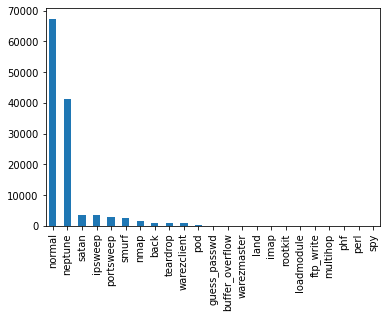

In [13]:
bar_graph('label')

In [14]:
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)



In [15]:
change_label(train_data)

In [16]:
train_data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

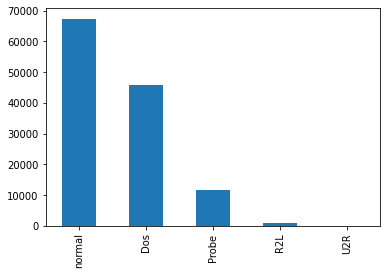

In [17]:
bar_graph('label')

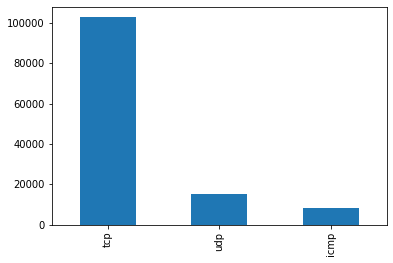

In [19]:
bar_graph('protocol_type')

In [20]:
services_frequency = train_data['service'].value_counts()
subsetServices= list(services_frequency[:30].index)
services_frequency

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
aol              2
http_8001        2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

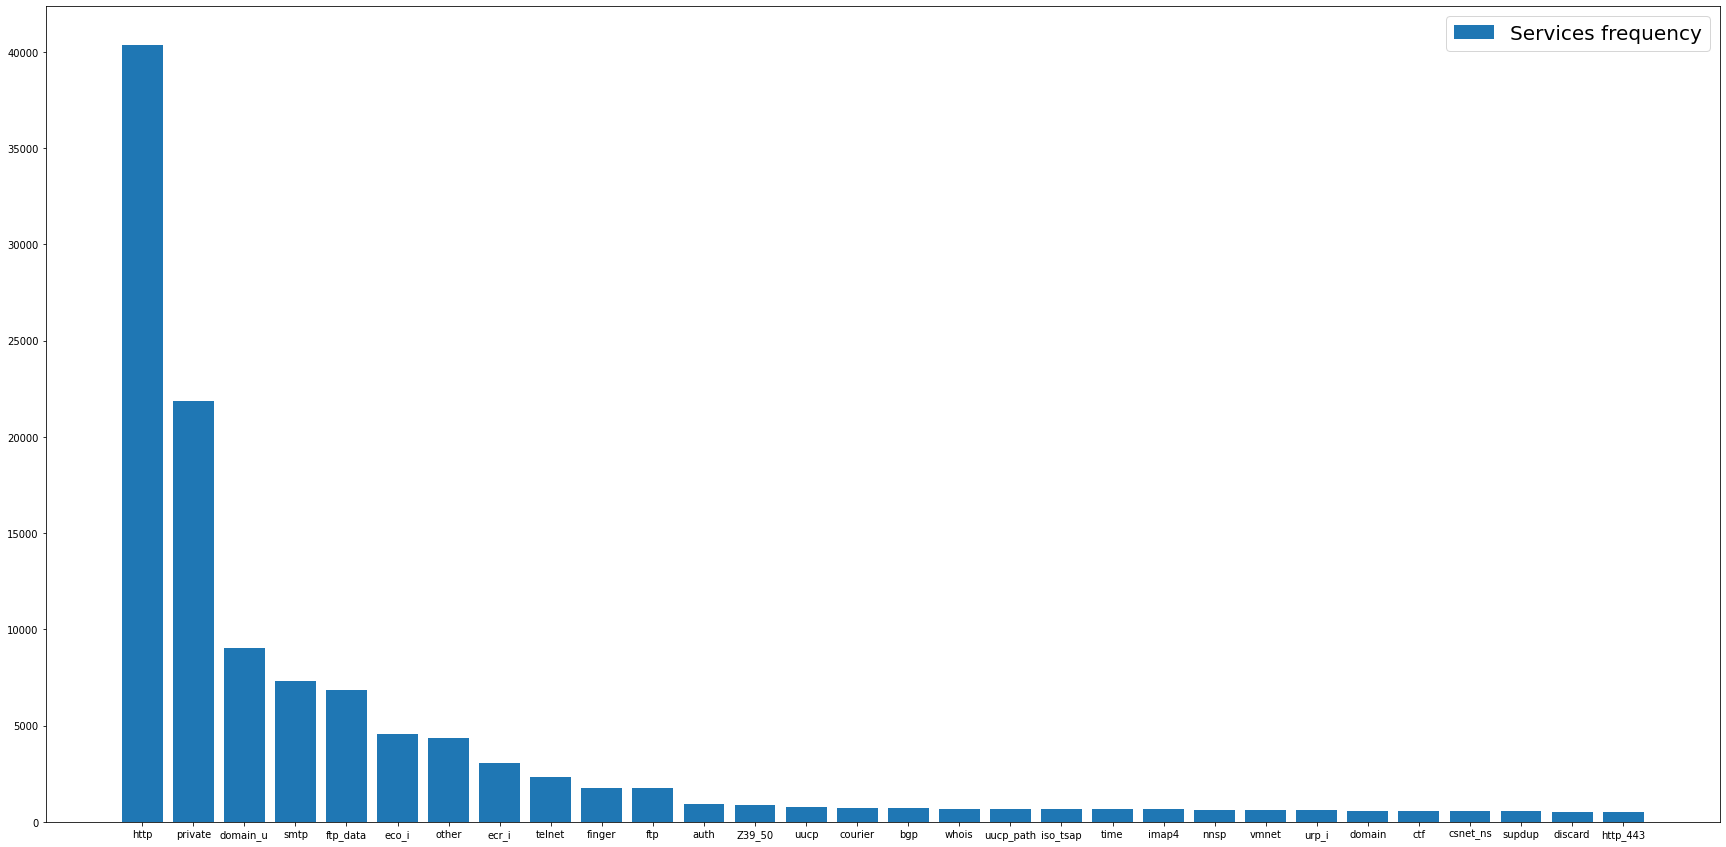

In [21]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(30,15)) 
plt.bar(subsetServices, services_frequency[:30], label = 'Services frequency')
ax.legend(fontsize = 20)

/root/anaconda3/envs/exp1/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


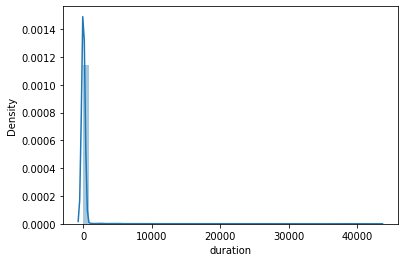

In [22]:
import seaborn as sns
df = train_data['duration']
df = pd.DataFrame(df)
data_feature = df.columns

for feature in data_feature:
    p = sns.distplot(a = df[feature])
    plt.show()

In [23]:
df['binned']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000])
df.head()

,duration,binned
0,0,"(-0.1, 0.0]"
1,0,"(-0.1, 0.0]"
2,0,"(-0.1, 0.0]"
3,0,"(-0.1, 0.0]"
4,0,"(-0.1, 0.0]"


In [24]:
df['duration_bin']=pd.cut(df['duration'], bins=[-0.1, 0 , 10000, 20000, 30000, 40000], labels=["0", " (0, 10000]", "(10000, 20000]","(20000, 30000]", "(30000, 40000]"])
df

,duration,binned,duration_bin
0,0,"(-0.1, 0.0]",0
1,0,"(-0.1, 0.0]",0
2,0,"(-0.1, 0.0]",0
3,0,"(-0.1, 0.0]",0
4,0,"(-0.1, 0.0]",0
...,...,...,...
125968,0,"(-0.1, 0.0]",0
125969,8,"(0.0, 10000.0]","(0, 10000]"
125970,0,"(-0.1, 0.0]",0
125971,0,"(-0.1, 0.0]",0


In [25]:
duration_frequency = df['duration_bin'].value_counts()
duration_frequency

0                 115955
 (0, 10000]         8804
(10000, 20000]       585
(30000, 40000]       281
(20000, 30000]       223
Name: duration_bin, dtype: int64

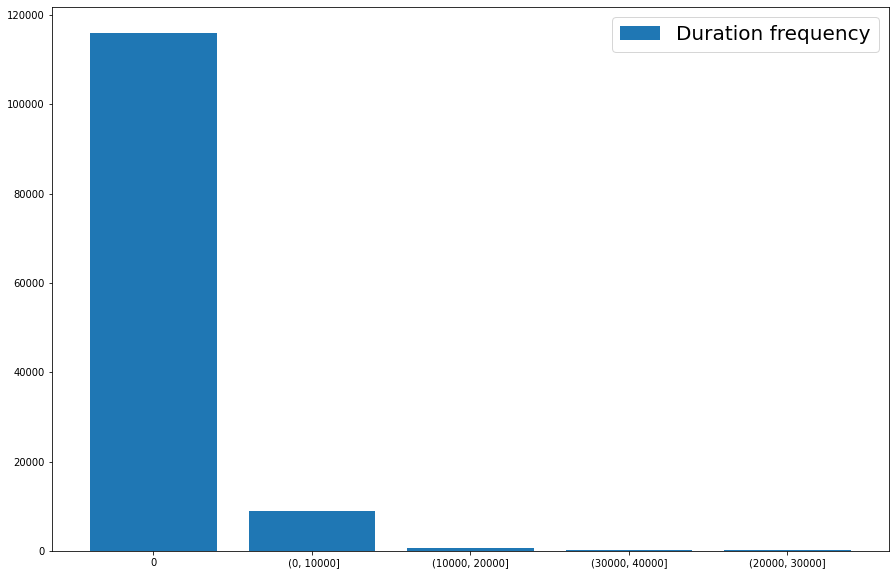

In [26]:
f, ax = plt.subplots(figsize=(15,10)) 
plt.bar(duration_frequency.index, duration_frequency, label = 'Duration frequency')
ax.legend(fontsize = 20)

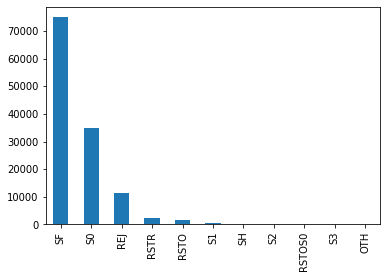

In [27]:
bar_graph('flag')

In [28]:
df= pd.DataFrame(columns=['protocol', 'Attack_class', 'number of sample in Dataset'])

In [29]:
protocols = pd.Series(train_data['protocol_type']).unique()
Label = pd.Series(train_data['label']).unique() 
Label= np.delete(Label, np.where(Label == 'normal'))

In [30]:
for pro in protocols:
  for lab in Label:
    i = len(train_data.loc[(train_data['protocol_type']== pro) & (train_data['label']==lab)])
    if (i != 0):
      df= df.append({'protocol': pro, 'Attack_class': lab, 'number of sample in Dataset': i}, ignore_index=True)

In [31]:
df.sort_values(by=['number of sample in Dataset'], ascending=False, ignore_index=True)

,protocol,Attack_class,number of sample in Dataset
0,tcp,Dos,42188
1,tcp,Probe,5857
2,icmp,Probe,4135
3,icmp,Dos,2847
4,udp,Probe,1664
5,tcp,R2L,995
6,udp,Dos,892
7,tcp,U2R,49
8,udp,U2R,3


In [32]:
df_service= pd.DataFrame(columns=['service', 'Attack_class', 'number of sample in Dataset'])

In [33]:
services = list(services_frequency.index)
Label = pd.Series(train_data['label']).unique() 
Label= np.delete(Label, np.where(Label == 'normal'))

In [34]:
for ser in services:
  for lab in Label:
    i = len(train_data.loc[(train_data['service']== ser) & (train_data['label']==lab)])
    if (i != 0):
      df_service= df_service.append({'service': ser, 'Attack_class': lab, 'number of sample in Dataset': i}, ignore_index=True)

In [35]:
df_service.sort_values(by=['number of sample in Dataset'], ascending=False)

,service,Attack_class,number of sample in Dataset
3,private,Dos,15971
4,private,Probe,4900
12,eco_i,Probe,4089
17,ecr_i,Dos,2844
0,http,Dos,2255
...,...,...,...
90,login,R2L,2
128,aol,Probe,2
129,http_8001,Probe,2
114,IRC,Probe,1


In [36]:
SP= pd.crosstab(train_data.service,train_data['protocol_type'],margins=True).T.style.background_gradient(cmap='summer_r')
SP

service,IRC,X11,Z39_50,aol,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,harvest,hostnames,http,http_2784,http_443,http_8001,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,All
protocol_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
icmp,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4586,3077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,8,0,10,602,0,0,0,0,8291
tcp,187,73,862,2,955,710,734,545,563,521,538,569,0,434,0,0,485,474,1767,1754,6860,518,2,460,40338,1,530,2,647,687,433,299,410,475,429,439,451,405,347,362,360,630,296,0,1871,5,78,264,69,18562,0,78,86,65,7313,245,311,381,544,477,2353,0,0,654,0,0,780,689,617,693,102689
udp,0,0,0,0,0,0,0,0,0,0,0,0,9043,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,2488,0,0,0,0,3291,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,14993
All,187,73,862,2,955,710,734,545,563,521,538,569,9043,434,4586,3077,485,474,1767,1754,6860,518,2,460,40338,1,530,2,647,687,433,299,410,475,429,439,451,405,347,362,360,630,296,168,4359,5,78,264,69,21853,8,78,86,65,7313,245,311,381,544,477,2353,3,8,654,10,602,780,689,617,693,125973


In [37]:
df= pd.DataFrame(columns=['protocol', 'service', 'label', 'number of sample in Dataset'])

In [38]:
services = list(services_frequency.index)
protocols = pd.Series(train_data['protocol_type']).unique()
Label = pd.Series(train_data['label']).unique() 

for ser in services:
  for pro in protocols:
    for lab in Label:
      i = len(train_data.loc[(train_data['service']== ser) & (train_data['protocol_type']== pro) & (train_data['label']==lab)])
      if (i != 0):
        df= df.append({'protocol': pro, 'service': ser, 'label': lab, 'number of sample in Dataset': i}, ignore_index=True)
        

 


In [39]:
df.sort_values(by=['number of sample in Dataset'], ascending=False)

,protocol,service,label,number of sample in Dataset
0,tcp,http,normal,38049
5,tcp,private,Dos,15079
10,udp,domain_u,normal,9034
12,tcp,smtp,normal,7029
15,tcp,ftp_data,normal,4984
...,...,...,...,...
111,tcp,login,R2L,2
159,tcp,aol,Probe,2
160,tcp,http_8001,Probe,2
138,tcp,IRC,Probe,1


In [40]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [41]:
bin_label = pd.DataFrame(train_data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [42]:
bin_data = train_data.copy()
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,abnormal
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal


In [43]:
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,1
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,1
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,1
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0


In [44]:
bin_data = pd.get_dummies(train_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="") 

bin_data['intrusion'] =enc_label

bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


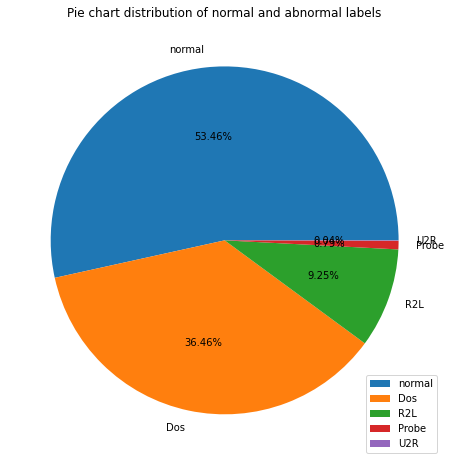

In [45]:
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [46]:
bin_data_train = bin_data.copy()
bin_data_train.drop(labels= [ 'label'], axis=1, inplace=True)
bin_data_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
numeric_col = train_data.select_dtypes(include='number').columns
numeric_bin_data = train_data[numeric_col]
numeric_bin_data['intrusion'] = bin_data['intrusion']

/root/anaconda3/envs/exp1/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
numeric_bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,8,105,145,0,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0,2231,384,0,0,0,0,0,1,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0,0,0,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


In [49]:
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.label)
multi_label

,label
0,normal
1,normal
2,Dos
3,normal
4,normal
...,...
125968,Dos
125969,normal
125970,normal
125971,Dos


In [50]:
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,4
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,4
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,4
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,4
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,4
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,0


In [51]:

multi_data = pd.get_dummies(multi_data,columns=['protocol_type','service','flag','label'],prefix="",prefix_sep="")  
multi_data['label'] = multi_label
multi_data


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,S2,S3,SF,SH,Dos,Probe,R2L,U2R,normal,label
0,0,491,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
1,0,146,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
4,0,199,420,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,normal
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,normal
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Dos


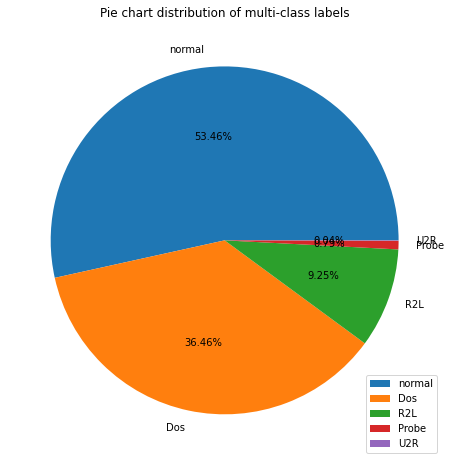

In [52]:
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.show()

In [53]:
multi_data_train = multi_data.copy()
multi_data_train.drop(labels= [ 'label', 'intrusion' ], axis=1, inplace=True)
multi_data_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,S1,S2,S3,SF,SH,Dos,Probe,R2L,U2R,normal
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
numeric_multi_data = train_data[numeric_col]
numeric_multi_data['label'] = multi_label
numeric_multi_data = pd.get_dummies(numeric_multi_data,columns=['label'],prefix="",prefix_sep="")
numeric_multi_data

/root/anaconda3/envs/exp1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Dos,Probe,R2L,U2R,normal
0,0,491,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,0,0,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0.04,0.03,0.01,0.00,0.01,0,0,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0
125969,8,105,145,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
125970,0,2231,384,0,0,0,0,0,1,0,...,0.00,0.72,0.00,0.01,0.00,0,0,0,0,1
125971,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,0,0


In [55]:
num_dataset_bin = numeric_bin_data.copy()
y_train_num_bin= num_dataset_bin[['intrusion']]
X_train_num_bin= num_dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_num_bin.shape,'\ny_train has shape:',y_train_num_bin.shape)

X_train has shape: (125973, 38) 
y_train has shape: (125973, 1)


In [56]:
dataset_bin = bin_data_train.copy()
y_train_bin= dataset_bin[['intrusion']]
X_train_bin= dataset_bin.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_bin.shape,'\ny_train has shape:',y_train_bin.shape)

X_train has shape: (125973, 122) 
y_train has shape: (125973, 1)


In [57]:
num_dataset_multi = numeric_multi_data.copy()
y_train_num_multi= num_dataset_multi.loc[:, 'Dos':]
X_train_num_multi= num_dataset_multi.loc[:, :'dst_host_srv_rerror_rate']

print('X_train has shape:',X_train_num_multi.shape,'\ny_train has shape:',y_train_num_multi.shape)

X_train has shape: (125973, 38) 
y_train has shape: (125973, 5)


In [58]:
dataset_multi = multi_data_train.copy()
y_train_multi= dataset_multi.loc[:, 'Dos':]
X_train_multi= dataset_multi.loc[:, :'SH']

print('X_train has shape:',X_train_multi.shape,'\ny_train has shape:',y_train_multi.shape)

X_train has shape: (125973, 122) 
y_train has shape: (125973, 5)


In [59]:
corr= numeric_bin_data.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
intrusion                   1.000000
Name: intrusion, dtype: float64

In [60]:
highest_corr_columns= highest_corr.index

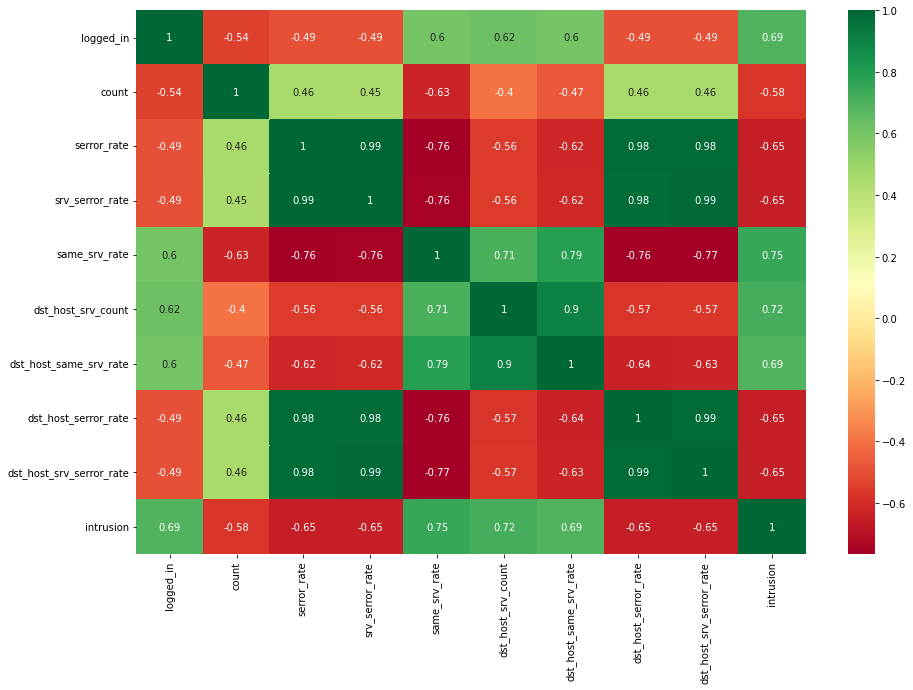

In [61]:
plt.figure(figsize=(15,10))
g=sns.heatmap(bin_data[highest_corr.index].corr(),annot=True,cmap="RdYlGn")

In [62]:
pearson_bin_dataset = numeric_bin_data[highest_corr_columns]
pearson_bin_dataset

,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,intrusion
0,0,2,0.0,0.0,1.00,25,0.17,0.00,0.00,1
1,0,13,0.0,0.0,0.08,1,0.00,0.00,0.00,1
2,0,123,1.0,1.0,0.05,26,0.10,1.00,1.00,0
3,1,5,0.2,0.2,1.00,255,1.00,0.03,0.01,1
4,1,30,0.0,0.0,1.00,255,1.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
125968,0,184,1.0,1.0,0.14,25,0.10,1.00,1.00,0
125969,0,2,0.0,0.0,1.00,244,0.96,0.00,0.00,1
125970,1,1,0.0,0.0,1.00,30,0.12,0.72,0.00,1
125971,0,144,1.0,1.0,0.06,8,0.03,1.00,1.00,0


In [63]:
corr = numeric_multi_data.corr()
corr_y = abs(corr[y_train_num_multi.columns])
highest_corr = corr_y[corr_y >0.5]
highest_corr

,Dos,Probe,R2L,U2R,normal
duration,NaN,NaN,NaN,NaN,NaN
src_bytes,NaN,NaN,NaN,NaN,NaN
dst_bytes,NaN,NaN,NaN,NaN,NaN
land,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN
urgent,NaN,NaN,NaN,NaN,NaN
hot,NaN,NaN,NaN,NaN,NaN
num_failed_logins,NaN,NaN,NaN,NaN,NaN
logged_in,0.580713,NaN,NaN,NaN,0.690171
num_compromised,NaN,NaN,NaN,NaN,NaN


In [64]:
Dos_features= highest_corr[highest_corr.Dos.notnull()].index
Probe_features= highest_corr[highest_corr.Probe.notnull()].index
R2L_features= highest_corr[highest_corr.R2L.notnull()].index
U2R_features= highest_corr[highest_corr.U2R.notnull()].index
normal_features= highest_corr[highest_corr.normal.notnull()].index


In [65]:
Dos_features.intersection(Probe_features)

Index([], dtype='object')

In [66]:
pearson_multi_features = list(set(Dos_features.union(normal_features).union(Probe_features).union(R2L_features).union(U2R_features)))
for lab in y_train_num_multi.columns:
  pearson_multi_features.remove(lab)
pearson_multi_features


['dst_host_srv_serror_rate',
 'dst_host_same_src_port_rate',
 'count',
 'dst_host_srv_count',
 'same_srv_rate',
 'dst_host_serror_rate',
 'srv_serror_rate',
 'dst_host_diff_srv_rate',
 'serror_rate',
 'dst_host_same_srv_rate',
 'logged_in']

In [67]:
pearson_multi_dataset = numeric_multi_data[pearson_multi_features]
pearson_multi_dataset

,dst_host_srv_serror_rate,dst_host_same_src_port_rate,count,dst_host_srv_count,same_srv_rate,dst_host_serror_rate,srv_serror_rate,dst_host_diff_srv_rate,serror_rate,dst_host_same_srv_rate,logged_in
0,0.00,0.17,2,25,1.00,0.00,0.0,0.03,0.0,0.17,0
1,0.00,0.88,13,1,0.08,0.00,0.0,0.60,0.0,0.00,0
2,1.00,0.00,123,26,0.05,1.00,1.0,0.05,1.0,0.10,0
3,0.01,0.03,5,255,1.00,0.03,0.2,0.00,0.2,1.00,1
4,0.00,0.00,30,255,1.00,0.00,0.0,0.00,0.0,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...
125968,1.00,0.00,184,25,0.14,1.00,1.0,0.06,1.0,0.10,0
125969,0.00,0.01,2,244,1.00,0.00,0.0,0.01,0.0,0.96,0
125970,0.00,0.00,1,30,1.00,0.72,0.0,0.06,0.0,0.12,1
125971,1.00,0.00,144,8,0.06,1.00,1.0,0.05,1.0,0.03,0


In [68]:
pearson_multi_dataset = pearson_multi_dataset.join(y_train_num_multi)
pearson_multi_dataset

,dst_host_srv_serror_rate,dst_host_same_src_port_rate,count,dst_host_srv_count,same_srv_rate,dst_host_serror_rate,srv_serror_rate,dst_host_diff_srv_rate,serror_rate,dst_host_same_srv_rate,logged_in,Dos,Probe,R2L,U2R,normal
0,0.00,0.17,2,25,1.00,0.00,0.0,0.03,0.0,0.17,0,0,0,0,0,1
1,0.00,0.88,13,1,0.08,0.00,0.0,0.60,0.0,0.00,0,0,0,0,0,1
2,1.00,0.00,123,26,0.05,1.00,1.0,0.05,1.0,0.10,0,1,0,0,0,0
3,0.01,0.03,5,255,1.00,0.03,0.2,0.00,0.2,1.00,1,0,0,0,0,1
4,0.00,0.00,30,255,1.00,0.00,0.0,0.00,0.0,1.00,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1.00,0.00,184,25,0.14,1.00,1.0,0.06,1.0,0.10,0,1,0,0,0,0
125969,0.00,0.01,2,244,1.00,0.00,0.0,0.01,0.0,0.96,0,0,0,0,0,1
125970,0.00,0.00,1,30,1.00,0.72,0.0,0.06,0.0,0.12,1,0,0,0,0,1
125971,1.00,0.00,144,8,0.06,1.00,1.0,0.05,1.0,0.03,0,1,0,0,0,0


In [69]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

chi_scores = chi2(X_train_bin,y_train_bin)
chi_scores

(array([7.08280969e+06, 3.34032490e+09, 1.74609581e+09, 6.51239512e+00,
        3.28272717e+03, 1.81710838e+00, 4.87618999e+02, 2.97369498e+00,
        3.62591460e+04, 2.68943252e+04, 5.17680356e+01, 1.17303524e+02,
        3.25504830e+04, 1.05355586e+03, 1.34709608e+01, 4.09027580e+02,
                   nan, 8.70617585e-01, 1.92525066e+02, 6.52574244e+06,
        1.42326958e+01, 3.73654160e+04, 3.74519039e+04, 6.92353165e+03,
        6.99752801e+03, 2.08265018e+04, 2.69428137e+03, 1.24533866e+03,
        9.57432784e+05, 6.96870490e+06, 2.34477802e+04, 3.19789138e+03,
        6.92743399e+02, 1.90567199e+02, 3.72260458e+04, 3.85444066e+04,
        6.35482480e+03, 6.86709925e+03, 4.72870818e+03, 6.57169092e+01,
        5.23482354e+03, 1.59085746e+02, 4.30897575e+01, 9.90101757e+02,
        2.29721985e+00, 3.17181626e+02, 8.15513048e+02, 8.43079686e+02,
        6.25992410e+02, 6.46667389e+02, 5.98425772e+02, 6.17952141e+02,
        5.00464631e+02, 7.83935970e+03, 4.98496708e+02, 3.348288

In [70]:
p_values = pd.Series(chi_scores[1],index = X_train_bin.columns)

p_values.sort_values(ascending = False , inplace = True)

In [71]:
p_values = p_values[:20]

<AxesSubplot:>

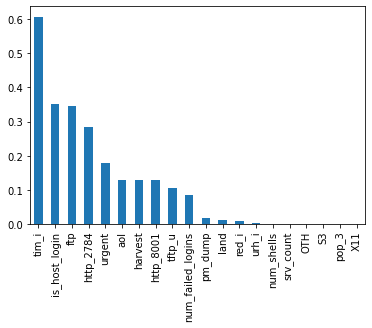

In [72]:
p_values.plot.bar()

In [73]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train_num_bin,y_train_num_bin)

In [74]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_num_bin.columns)

In [75]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores

,Specs,Score
0,duration,7.082810e+06
1,src_bytes,3.340325e+09
2,dst_bytes,1.746096e+09
3,land,6.512395e+00
4,wrong_fragment,3.282727e+03
5,urgent,1.817108e+00
6,hot,4.876190e+02
7,num_failed_logins,2.973695e+00
8,logged_in,3.625915e+04
9,num_compromised,2.689433e+04


In [76]:
data_chi2_10best = pd.DataFrame(featureScores.nlargest(10,'Score'))
data_chi2_10best

,Specs,Score
1,src_bytes,3.340325e+09
2,dst_bytes,1.746096e+09
0,duration,7.082810e+06
29,dst_host_srv_count,6.968705e+06
19,count,6.525742e+06
28,dst_host_count,9.574328e+05
35,dst_host_srv_serror_rate,3.854441e+04
22,srv_serror_rate,3.745190e+04
21,serror_rate,3.736542e+04
34,dst_host_serror_rate,3.722605e+04


In [77]:
data_chi2_10best = list(data_chi2_10best['Specs'])

In [78]:
Chi2_dataset = X_train_num_bin[data_chi2_10best]
Chi2_dataset

,src_bytes,dst_bytes,duration,dst_host_srv_count,count,dst_host_count,dst_host_srv_serror_rate,srv_serror_rate,serror_rate,dst_host_serror_rate
0,491,0,0,25,2,150,0.00,0.0,0.0,0.00
1,146,0,0,1,13,255,0.00,0.0,0.0,0.00
2,0,0,0,26,123,255,1.00,1.0,1.0,1.00
3,232,8153,0,255,5,30,0.01,0.2,0.2,0.03
4,199,420,0,255,30,255,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,25,184,255,1.00,1.0,1.0,1.00
125969,105,145,8,244,2,255,0.00,0.0,0.0,0.00
125970,2231,384,0,30,1,255,0.00,0.0,0.0,0.72
125971,0,0,0,8,144,255,1.00,1.0,1.0,1.00


In [79]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_multi,y_train_multi)

ExtraTreesClassifier()

In [80]:
print(model.feature_importances_) 

[2.36782059e-03 2.27202587e-02 4.60281985e-03 4.48081551e-05
 1.02403027e-02 1.71766520e-05 6.49559595e-03 3.07965238e-04
 6.40999494e-02 4.71671823e-03 2.09134083e-04 4.40845718e-05
 3.61362408e-04 1.32819497e-04 5.91272156e-05 8.68522095e-05
 0.00000000e+00 2.32216841e-08 1.07267887e-03 2.69833232e-02
 1.18091320e-02 5.05340625e-02 4.60768400e-02 1.31618285e-02
 1.40664955e-02 9.09893808e-02 1.46174381e-02 9.38566110e-03
 1.57830731e-02 4.71750738e-02 5.89702929e-02 3.10117888e-02
 2.92938551e-02 1.18643222e-02 4.60463166e-02 6.50794718e-02
 1.81858588e-02 7.73157048e-03 2.16568351e-02 1.43330852e-02
 1.26971189e-02 7.59777530e-04 7.83374606e-05 1.24610995e-05
 9.18632512e-07 1.28528332e-04 9.24769416e-05 1.41164318e-05
 9.37431510e-06 1.14418915e-05 1.75080533e-05 5.88850202e-05
 6.25871431e-05 6.00164875e-03 1.85426012e-05 2.65291954e-02
 1.85994973e-02 7.97002171e-06 3.55268226e-06 3.30213519e-04
 6.45306845e-04 3.75782819e-03 9.14440343e-05 2.04286066e-11
 3.50339814e-06 2.267195

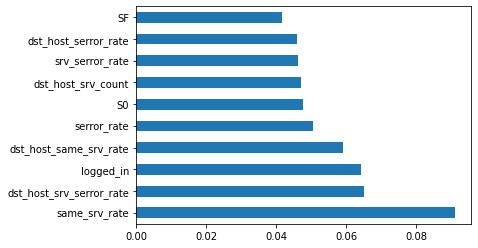

In [81]:
feat_importances = pd.Series(model.feature_importances_, index=X_train_multi.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_num_multi,y_train_num_multi)

ExtraTreesClassifier()

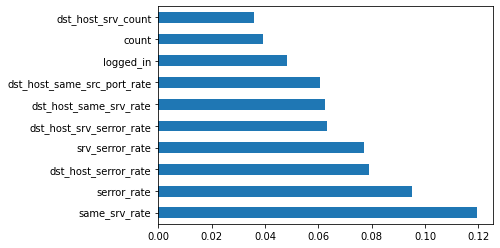

In [83]:
feat_importances = pd.Series(model.feature_importances_, index=X_train_num_multi.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [84]:
numeric_col = train_data.select_dtypes(include='number').columns

In [85]:
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [86]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [87]:
data = standardization(train_data.copy(),numeric_col)

In [88]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


In [89]:
cat_col = ['protocol_type','service','flag']

In [90]:
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [91]:
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [92]:
Normalized_dataset = pd.concat([categorical, data],axis=1)
Normalized_dataset.drop(labels=cat_col, axis=1, inplace=True)

In [93]:
X = Normalized_dataset.loc[:,:'dst_host_srv_rerror_rate']
y_bin = numeric_bin_data['intrusion']

In [94]:
y_multi = multi_data['label']

In [95]:
from sklearn.preprocessing import LabelBinarizer

y_multi = LabelBinarizer().fit_transform(y_multi)

In [96]:
y_multi

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y_bin, test_size=0.25, random_state=42)

In [98]:
%%time
svm = SVC(kernel='linear',gamma='auto') 
svm.fit(X_train,y_train) 

CPU times: user 4min 17s, sys: 859 ms, total: 4min 18s
Wall time: 4min 19s


SVC(gamma='auto', kernel='linear')

In [99]:
y_pred = svm.predict(X_test) 
ac = accuracy_score(y_test, y_pred)*100 
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  97.5392138185051


In [100]:
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.98      0.97      0.97     14720
      normal       0.97      0.98      0.98     16774

    accuracy                           0.98     31494
   macro avg       0.98      0.98      0.98     31494
weighted avg       0.98      0.98      0.98     31494



In [101]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.024607861814948877
Mean Squared Error -  0.024607861814948877
Root Mean Squared Error -  0.1568689319621603
R2 Score -  90.1199801808959
Accuracy -  97.5392138185051


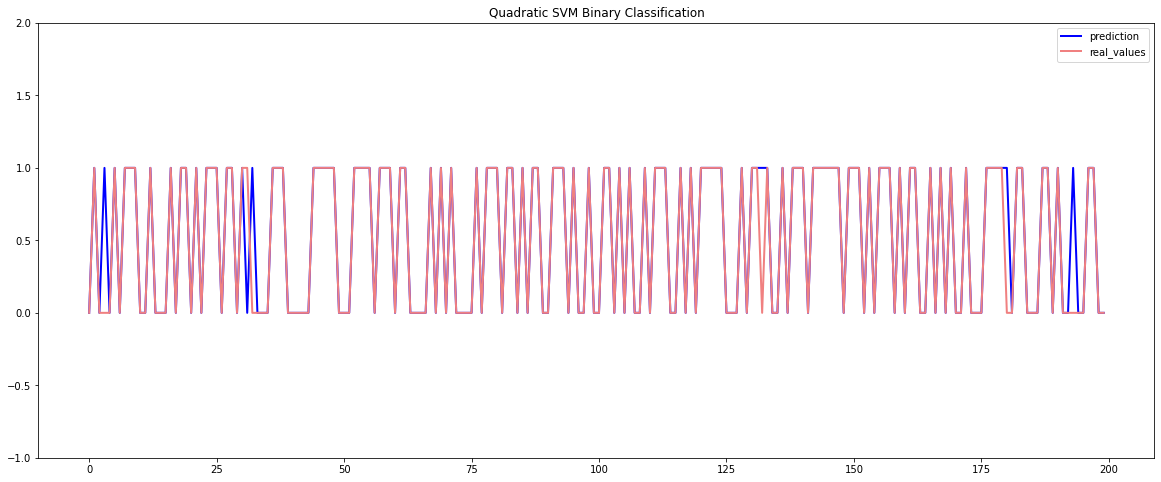

In [102]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic SVM Binary Classification")
plt.show()

In [103]:
%%time
qsvm=SVC(kernel='poly',gamma='auto') 
qsvm.fit(X_train,y_train)

CPU times: user 10min 50s, sys: 1.22 s, total: 10min 51s
Wall time: 10min 53s


SVC(gamma='auto', kernel='poly')

In [104]:
y_pred=qsvm.predict(X_test) 
ac=accuracy_score(y_test, y_pred)*100 
print("QSVM-Classifier Binary Set-Accuracy is ", ac)

QSVM-Classifier Binary Set-Accuracy is  96.77716390423574


In [105]:
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       1.00      0.94      0.96     14720
      normal       0.95      1.00      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



In [106]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.03222836095764273
Mean Squared Error -  0.03222836095764273
Root Mean Squared Error -  0.17952259177508195
R2 Score -  87.36508583094437
Accuracy -  96.77716390423574


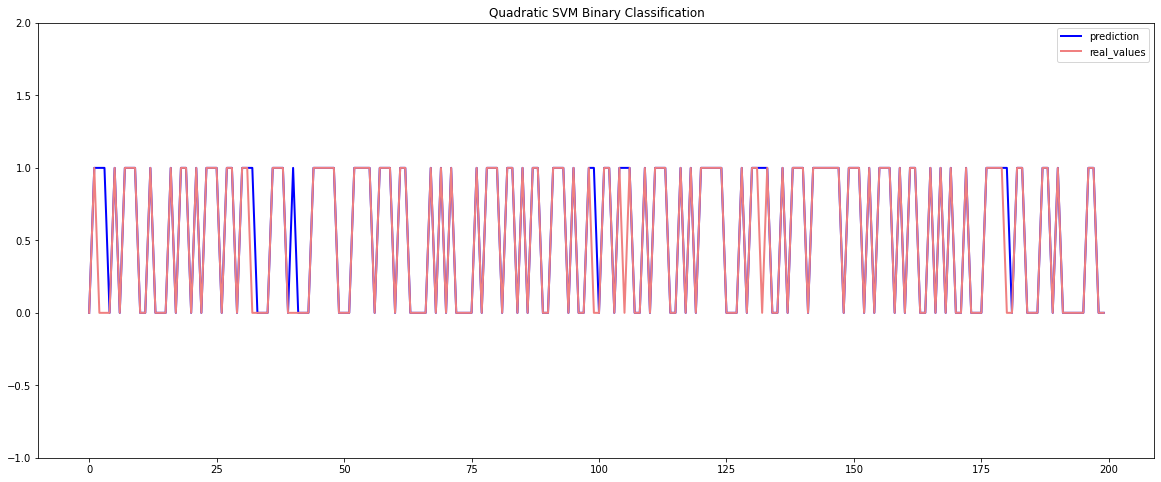

In [107]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[400:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Quadratic SVM Binary Classification")
plt.show()

In [108]:
%%time
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train) 

CPU times: user 48.4 ms, sys: 32 ms, total: 80.4 ms
Wall time: 83.2 ms


KNeighborsClassifier()

In [109]:
y_pred=knn.predict(X_test) 
ac=accuracy_score(y_test, y_pred)*100
print("KNN-Classifier Binary Set-Accuracy is ", ac)

KNN-Classifier Binary Set-Accuracy is  99.60309900298469


In [110]:
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       1.00      1.00      1.00     14720
      normal       1.00      1.00      1.00     16774

    accuracy                           1.00     31494
   macro avg       1.00      1.00      1.00     31494
weighted avg       1.00      1.00      1.00     31494



In [111]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.003969009970153045
Mean Squared Error -  0.003969009970153045
Root Mean Squared Error -  0.06300007912814908
R2 Score -  98.40564711626689
Accuracy -  99.60309900298469


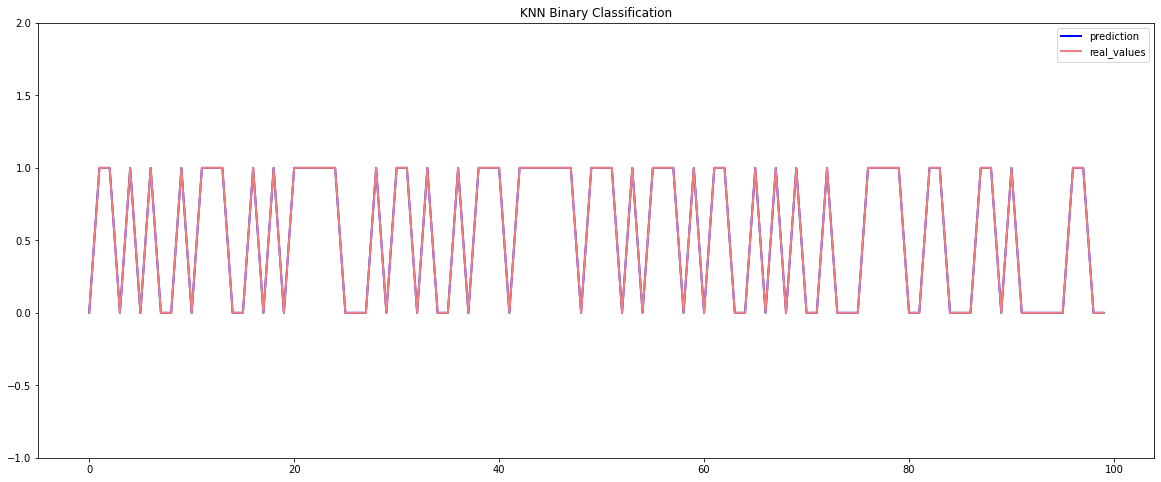

In [112]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("KNN Binary Classification")
plt.show()

In [113]:
X_train = X_train.values

In [114]:
y_train = np.array(y_train)

In [115]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))

In [116]:
x_train.shape

(94479, 1, 122)

In [117]:
lst = Sequential()

lst.add(LSTM(50,input_dim=122))

lst.add(Dense(1,activation='sigmoid'))

/root/anaconda3/envs/exp1/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/root/anaconda3/envs/exp1/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, input_shape=(None, 122...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [119]:
lst.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                34600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 34,651
Trainable params: 34,651
Non-trainable params: 0
_________________________________________________________________


In [120]:
%%time
history = lst.fit(x_train, y_train, epochs=20, batch_size=5000,validation_split=0.2)




Train on 75583 samples, validate on 18896 samples
Epoch 1/20





75583/75583 [==============================] - 2s 27us/step - loss: 0.6466 - acc: 0.6977 - val_loss: 0.5464 - val_acc: 0.9185
Epoch 2/20
75583/75583 [==============================] - 1s 10us/step - loss: 0.4814 - acc: 0.9304 - val_loss: 0.4095 - val_acc: 0.9354
Epoch 3/20
75583/75583 [==============================] - 1s 9us/step - loss: 0.3614 - acc: 0.9373 - val_loss: 0.3093 - val_acc: 0.9392
Epoch 4/20
75583/75583 [==============================] - 1s 9us/step - loss: 0.2746 - acc: 0.9432 - val_loss: 0.2387 - val_acc: 0.9499
Epoch 5/20
75583/75583 [==============================] - 1s 9us/step - loss: 0.2146 - acc: 0.9551 - val_loss: 0.1912 - val_acc: 0.9594
Epoch 6/20
75583/75583 [==============================] - 1s 9us/step - loss: 0.1744 - acc: 0.9625 - val_loss: 0.1595 - val_acc: 0.9635
Epoch 7/20
75583/75583 [==============================] - 1s 10us/step - loss: 0.1475 - acc: 0.9651 - val_loss: 0.1382 - val

In [121]:
X_test = X_test.to_numpy()

In [122]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [123]:
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [124]:
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

31494/31494 [==============================] - 2s 63us/step
Test results - Loss: 0.06862966785882921 - Accuracy: 97.48841049088716%


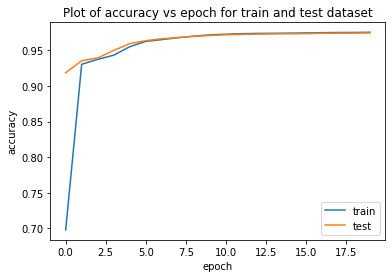

In [125]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

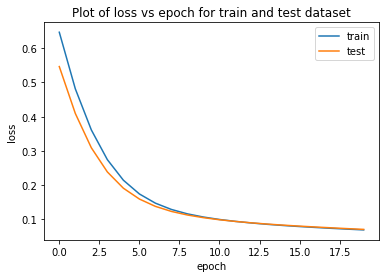

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [127]:
y_test.shape

(31494,)

In [128]:
y_pred = lst.predict(x_test)

In [129]:
y_pred.shape

(31494, 1)

In [130]:
y_pred = lst.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

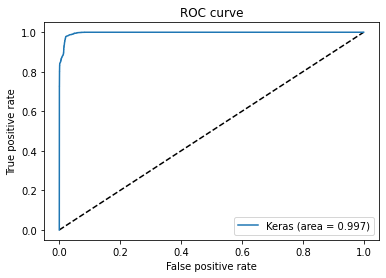

In [131]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [132]:
y_classes = (lst.predict(x_test)>0.5).astype('int32')

In [133]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9896864194586861
F1 Score -  0.9767305033389228
Precision Score -  0.9641094140193972


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y_multi, test_size=0.25, random_state=42)

In [135]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train) 

KNeighborsClassifier()

In [136]:
y_pred=knn.predict(X_test)  
ac=accuracy_score(y_test, y_pred)*100 
print("KNN-Classifier Multi-class Set-Accuracy is ", ac)

KNN-Classifier Multi-class Set-Accuracy is  99.57134692322347


In [137]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

              precision    recall  f1-score   support

         Dos       1.00      1.00      1.00     11484
       Probe       0.99      0.99      0.99      2947
         R2L       0.94      0.93      0.93       274
         U2R       0.50      0.27      0.35        15
      normal       1.00      1.00      1.00     16774

   micro avg       1.00      1.00      1.00     31494
   macro avg       0.88      0.84      0.85     31494
weighted avg       1.00      1.00      1.00     31494
 samples avg       1.00      1.00      1.00     31494



/root/anaconda3/envs/exp1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.0016638089794881565
Mean Squared Error -  0.0016638089794881565
Root Mean Squared Error -  0.04078981465376077
R2 Score -  76.46474939829632
Accuracy -  99.57134692322347


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X,y_multi, test_size=0.25, random_state=42)

In [140]:
mlp = Sequential() 
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
mlp.add(Dense(units=5,activation='softmax'))

In [141]:
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [142]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                6150      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 255       
Total params: 6,405
Trainable params: 6,405
Non-trainable params: 0
_________________________________________________________________


In [143]:
%%time
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Train on 75583 samples, validate on 18896 samples
Epoch 1/100
75583/75583 [==============================] - 1s 14us/step - loss: 1.3543 - acc: 0.5451 - val_loss: 0.9747 - val_acc: 0.8024
Epoch 2/100
75583/75583 [==============================] - 0s 6us/step - loss: 0.7678 - acc: 0.8355 - val_loss: 0.5681 - val_acc: 0.8760
Epoch 3/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.4681 - acc: 0.8860 - val_loss: 0.3790 - val_acc: 0.9003
Epoch 4/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.3300 - acc: 0.9222 - val_loss: 0.2883 - val_acc: 0.9415
Epoch 5/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.2593 - acc: 0.9464 - val_loss: 0.2376 - val_acc: 0.9520
Epoch 6/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.2173 - acc: 0.9532 - val_loss: 0.2052 - val_acc: 0.9555
Epoch 7/100
75583/75583 [==============================] - 0s 7us/step - loss: 0.1891 - acc: 0.9572 - val_loss: 0.1823 - val_ac

75583/75583 [==============================] - 0s 6us/step - loss: 0.0283 - acc: 0.9924 - val_loss: 0.0325 - val_acc: 0.9915
Epoch 61/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.0280 - acc: 0.9928 - val_loss: 0.0323 - val_acc: 0.9917
Epoch 62/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.0277 - acc: 0.9925 - val_loss: 0.0318 - val_acc: 0.9917
Epoch 63/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.0273 - acc: 0.9928 - val_loss: 0.0316 - val_acc: 0.9918
Epoch 64/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.0271 - acc: 0.9928 - val_loss: 0.0313 - val_acc: 0.9918
Epoch 65/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.0268 - acc: 0.9929 - val_loss: 0.0310 - val_acc: 0.9918
Epoch 66/100
75583/75583 [==============================] - 0s 5us/step - loss: 0.0265 - acc: 0.9928 - val_loss: 0.0308 - val_acc: 0.9916
Epoch 67/100
75583/75583 [=====================

In [144]:
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [145]:
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

31494/31494 [==============================] - 1s 47us/step
Test results - Loss: 0.026992097765158585 - Accuracy: 99.23795008573062%


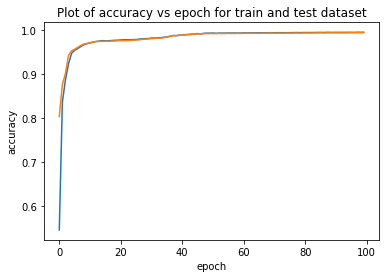

In [146]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

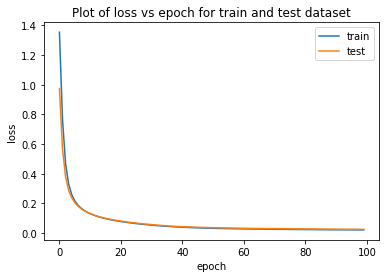

In [147]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()